In [2]:
import PIL.features
import pandas as pd
import glob
from PIL import Image
import numpy as np
import gc
from matplotlib.pyplot import *
import os


In [3]:
PIL.features.pilinfo()

--------------------------------------------------------------------
Pillow 9.0.1
Python 3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]
--------------------------------------------------------------------
Python modules loaded from C:\Users\Tyler\anaconda3\envs\tensorflow\lib\site-packages\PIL
Binary modules loaded from C:\Users\Tyler\anaconda3\envs\tensorflow\lib\site-packages\PIL
--------------------------------------------------------------------
--- PIL CORE support ok, compiled for 9.0.1
--- TKINTER support ok, loaded 8.6
--- FREETYPE2 support ok, loaded 2.10.4
*** LITTLECMS2 support not installed
--- WEBP support ok, loaded 1.2.0
--- WEBP Transparency support ok
*** WEBPMUX support not installed
*** WEBP Animation support not installed
--- JPEG support ok, compiled for 9.0
*** OPENJPEG (JPEG2000) support not installed
--- ZLIB (PNG/ZIP) support ok, loaded 1.2.11
--- LIBTIFF support ok, loaded 4.2.0
*** RAQM (Bidirectional Text) support not installed
*** LIBIM

In [4]:
##functions for reading in folder of the images
# def image_reader(foldername):
#     images = []
#     for f in glob.iglob("C:/Users/Tyler/PycharmProjects/EE485_Final_Project/Lung_images/"+ foldername +"/*"):
#         images.append(Image.open(f))
#     images = np.asarray(images)
#     #print(images.shape)
#     label = [foldername for i in range(len(images))]
#     R = images[:,:,:,0].tolist()
#     G = images[:,:,:,1].tolist()
#     B = images[:,:,:,2].tolist()
#     #print(R.shape,G.shape,B.shape)
#     images_dict = {'R': R, 'G': G, 'B':B , 'Label': label}
#     df = pd.DataFrame(images_dict)
#     return df

In [5]:
## new verison of image_reader might be a little faster
def image_reader(foldername):
    dirname = os.path.join(os.getcwd(),'Lung_images',foldername)
    numfiles = len(glob.glob(dirname + "/*.png"))
    print(dirname, 'Number of files = ' + str(numfiles), sep = '\n')
    images = glob.glob(dirname + "/*.png")
    R = []
    G = []
    B = []
    label = []
    for i in range(numfiles):
        im = Image.open(images[i])
        R.append(list(im.getchannel(0).getdata()))
        G.append(list(im.getchannel(1).getdata()))
        B.append(list(im.getchannel(2).getdata()))
        label.append(foldername)
    images_dict = {'R': R, 'G': G, 'B':B , 'Label': label}
    df = pd.DataFrame(images_dict)
    return df

In [6]:
#emphy images
my_df_emph= image_reader('emphysema')

C:\Users\Tyler\PycharmProjects\EE485_Final_Project\Lung_images\emphysema
Number of files = 2706


In [7]:
my_df_emph

,R,G,B,Label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[166, 164, 186, 166, 139, 161, 165, 176, 255, ...",emphysema
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 205, 94, 118, 82, 110, 252, 25...",emphysema
2,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 166, 49, 0...","[252, 255, 255, 255, 221, 142, 97, 0, 0, 0, 0,...",emphysema
3,"[255, 197, 174, 209, 255, 234, 151, 158, 172, ...","[49, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",emphysema
4,"[172, 175, 193, 200, 144, 156, 165, 158, 133, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",emphysema
...,...,...,...,...
2701,"[199, 153, 165, 191, 219, 204, 167, 177, 188, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 255, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 1...",emphysema
2702,"[188, 139, 124, 120, 255, 255, 255, 255, 255, ...","[0, 0, 0, 0, 9, 255, 255, 255, 255, 255, 255, ...","[0, 0, 0, 0, 0, 255, 173, 180, 150, 100, 191, ...",emphysema
2703,"[193, 200, 167, 175, 162, 183, 185, 164, 163, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 159, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",emphysema
2704,"[163, 203, 184, 199, 255, 221, 168, 154, 176, ...","[0, 0, 0, 0, 159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",emphysema


In [8]:
#fibrosis
my_df_fibr = image_reader('fibrosis')
my_df_fibr

C:\Users\Tyler\PycharmProjects\EE485_Final_Project\Lung_images\fibrosis
Number of files = 21598


,R,G,B,Label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[178, 176, 166, 154, 122, 138, 110, 120, 117, ...",fibrosis
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[117, 160, 168, 161, 130, 157, 208, 189, 135, ...",fibrosis
2,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[135, 145, 129, 127, 151, 172, 222, 165, 174, ...",fibrosis
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[167, 129, 180, 184, 190, 156, 133, 142, 188, ...",fibrosis
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[188, 195, 212, 185, 181, 177, 175, 138, 149, ...",fibrosis
...,...,...,...,...
21593,"[177, 139, 151, 162, 141, 142, 174, 195, 221, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 227, 240, 255, 198...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0,...",fibrosis
21594,"[221, 255, 255, 255, 255, 255, 255, 255, 247, ...","[0, 227, 240, 255, 198, 160, 27, 171, 0, 0, 3,...","[0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",fibrosis
21595,"[247, 211, 255, 216, 196, 136, 161, 179, 185, ...","[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",fibrosis
21596,"[194, 238, 255, 255, 255, 255, 255, 255, 255, ...","[0, 0, 27, 18, 219, 255, 255, 255, 255, 137, 6...","[0, 0, 0, 0, 0, 110, 37, 24, 56, 0, 0, 0, 0, 0...",fibrosis


In [9]:
#ground_glass
my_df_ground = image_reader('ground_glass')

C:\Users\Tyler\PycharmProjects\EE485_Final_Project\Lung_images\ground_glass
Number of files = 14519


In [10]:
#healthy
my_df_healthy = image_reader('healthy')

C:\Users\Tyler\PycharmProjects\EE485_Final_Project\Lung_images\healthy
Number of files = 19293


In [11]:
#micornodules
my_df_micro = image_reader('micronodules')

C:\Users\Tyler\PycharmProjects\EE485_Final_Project\Lung_images\micronodules
Number of files = 32997


In [20]:
my_df_micro

,R,G,B,Label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[137, 145, 184, 127, 167, 175, 149, 124, 196, ...",micronodules
1,"[255, 255, 255, 207, 140, 167, 188, 190, 167, ...","[255, 255, 160, 0, 0, 0, 0, 0, 0, 0, 0, 0, 141...","[196, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87,...",micronodules
2,"[167, 173, 152, 206, 255, 255, 255, 255, 255, ...","[0, 0, 0, 0, 141, 255, 255, 255, 255, 255, 255...","[0, 0, 0, 0, 0, 87, 31, 16, 75, 180, 255, 255,...",micronodules
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[142, 55, 139, 175, 153, 129, 100, 126, 159, 1...",micronodules
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[159, 159, 161, 201, 210, 189, 205, 238, 191, ...",micronodules
...,...,...,...,...
32992,"[255, 237, 255, 255, 255, 255, 255, 255, 255, ...","[12, 0, 13, 82, 180, 254, 196, 106, 169, 81, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",micronodules
32993,"[255, 255, 255, 233, 211, 209, 182, 205, 226, ...","[19, 10, 2, 0, 0, 0, 0, 0, 0, 0, 0, 169, 255, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 252,...",micronodules
32994,"[226, 215, 206, 255, 255, 255, 255, 255, 238, ...","[0, 0, 0, 169, 255, 255, 255, 31, 0, 0, 0, 34,...","[0, 0, 0, 0, 255, 252, 166, 0, 0, 0, 0, 0, 0, ...",micronodules
32995,"[238, 237, 241, 255, 254, 255, 255, 255, 255, ...","[0, 0, 0, 34, 0, 51, 134, 255, 255, 168, 27, 1...","[0, 0, 0, 0, 0, 0, 0, 151, 113, 0, 0, 0, 0, 0,...",micronodules


In [ ]:
## final dataframe with all my images and labels
final_df = pd.concat([my_df_micro,my_df_healthy,my_df_ground,my_df_fibr,my_df_emph])

In [12]:
## final dataframe with all my images and labels
final_df = pd.concat([my_df_micro,my_df_healthy,my_df_ground,my_df_fibr,my_df_emph])

In [19]:
final_df.to_csv('labeled_df_s22.csv')
gc.collect()

0

In [14]:
import matplotlib.pyplot as plt

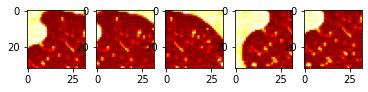

In [15]:
for i in range(0,5):
    ax = plt.subplot(2, 5, i+1)
    R = np.array(final_df["R"].values[i]).reshape(32,32)
    G = np.array(final_df["G"].values[i]).reshape(32,32)
    B = np.array(final_df["B"].values[i]).reshape(32,32)
    rgb = np.dstack((R,G,B))
    ax.imshow(rgb)

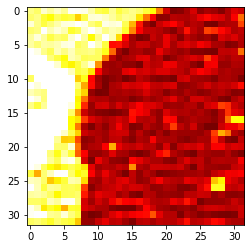

In [16]:
im = np.asarray(Image.open("C:/Users/Tyler/PycharmProjects/EE485_Final_Project/Lung_images/micronodules/micronodules_series2_slice0006_patch8010_patient182.png"))
plt.imshow(im)